In [3]:
import os

path = '..\\3. Dataset\\AI Specialist Support 02B'

os.chdir(path)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Image

In [ ]:
#!pip install pykalman --quiet

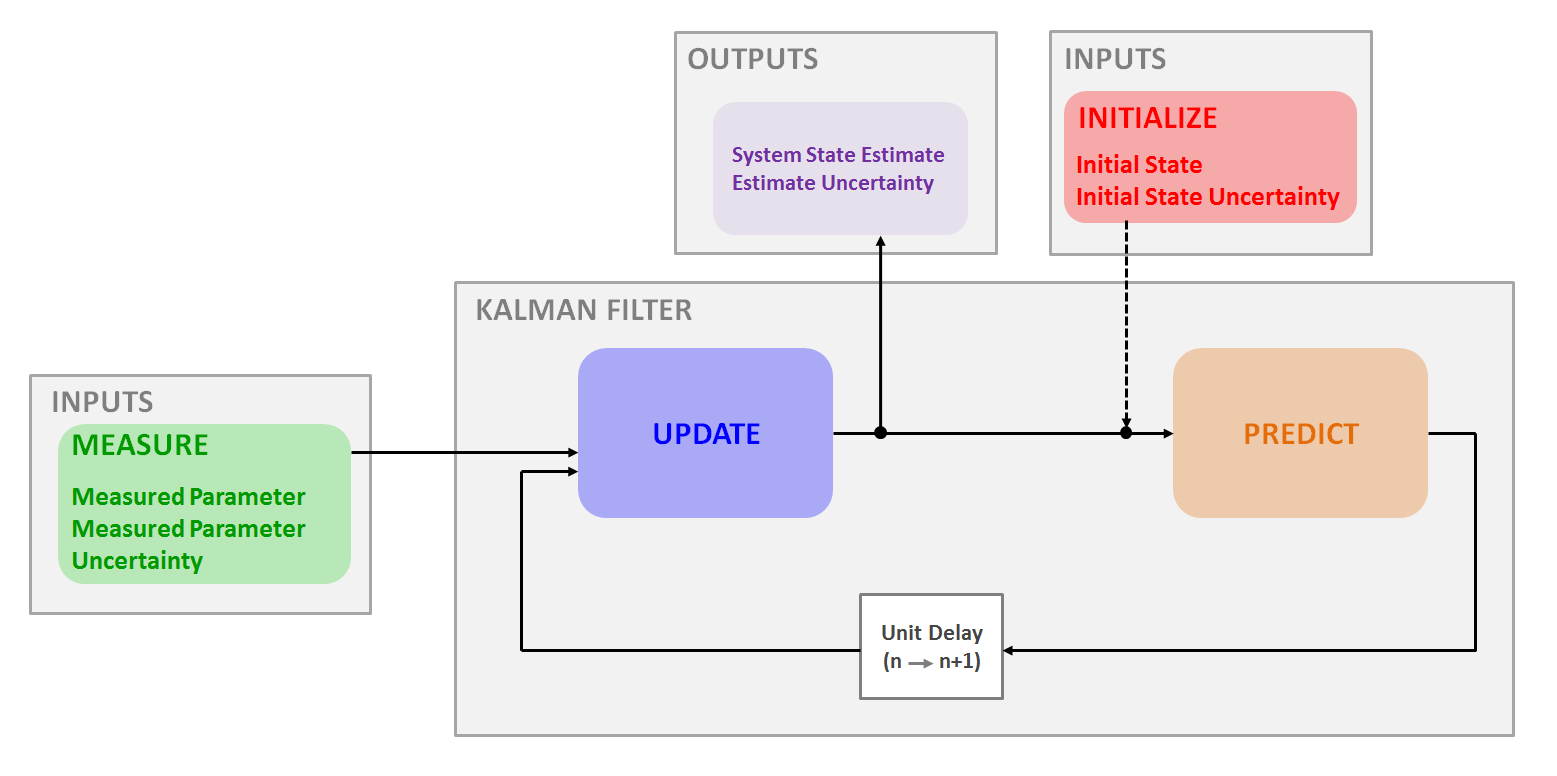

In [4]:
display(Image(filename='Kalman Filter.png'))

In [5]:
Facebook = pd.read_csv('Facebook.csv')
display(Facebook.head())
print(Facebook.shape)

,Date,Open,High,Low,Close,Adj Close,Volume
0,5/18/2012,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,5/21/2012,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,5/22/2012,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,5/23/2012,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,5/24/2012,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


(2227, 7)


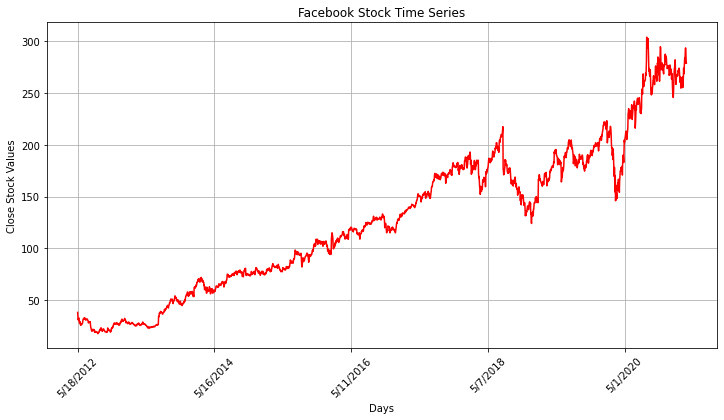

In [7]:
company = Facebook.copy()
companyName = "Facebook"

plt.figure(figsize=(12, 6))
plt.plot(company["Close"].values, "red", lw=1.5)
plt.xticks(range(0, company.shape[0], 500), company["Date"].loc[::500], rotation=45)
plt.title(f"{companyName} Stock Time Series")
plt.xlabel("Days")
plt.ylabel("Close Stock Values")
plt.grid()

In [10]:
from pykalman import KalmanFilter

kf = KalmanFilter(transition_matrices = [1], observation_matrices = [1], initial_state_mean = 0, 
                 initial_state_covariance = 1, observation_covariance = 1, transition_covariance = 0.0001)
mean, cov = kf.filter(company["Close"].values)
print(len(mean))

2227


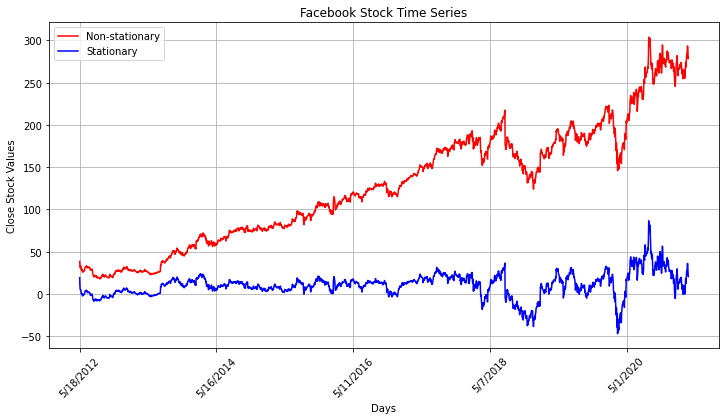

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(company["Close"].values, "red", lw=1.5, label="Non-stationary")
plt.plot(company["Close"].values - mean.flatten(), "blue", lw=1.5, label="Stationary")
plt.xticks(range(0, company.shape[0], 500), company["Date"].loc[::500], rotation=45)
plt.title(f"{companyName} Stock Time Series")
plt.xlabel("Days")
plt.ylabel("Close Stock Values")
plt.grid()
plt.legend()

In [13]:
# Data preparation
data = company.filter(["Open"])
display(data)
dataset = data.values
train_len = int(np.ceil(len(dataset) * 0.9))
train_len

,Open
0,42.049999
1,36.529999
2,32.610001
3,31.370001
4,32.950001
...,...
2222,281.220001
2223,290.450012
2224,293.149994
2225,291.000000


2005

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[:train_len]
print(train_data)
print(train_data.shape)

[[0.08497589]
 [0.06540697]
 [0.05151021]
 ...
 [0.66980999]
 [0.67370956]
 [0.68448668]]
(2005, 1)


In [16]:
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train)
print(X_train.shape)
print(y_train)

[[0.08497589 0.06540697 0.05151021 ... 0.0094654  0.01180516 0.01442853]
 [0.06540697 0.05151021 0.0471143  ... 0.01180516 0.01442853 0.01180516]
 [0.05151021 0.0471143  0.05271554 ... 0.01442853 0.01180516 0.00907544]
 ...
 [0.68143789 0.68576291 0.68104793 ... 0.66945546 0.65059559 0.64563243]
 [0.68576291 0.68104793 0.67275242 ... 0.65059559 0.64563243 0.66980999]
 [0.68104793 0.67275242 0.67867272 ... 0.64563243 0.66980999 0.67370956]]
(1945, 60)
[0.01180516 0.00907544 0.00836642 ... 0.66980999 0.67370956 0.68448668]


In [29]:
test_data = scaled_data[train_len - 60:]

X_test = []
y_test = dataset[train_len:]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

X_test = np.array(X_test)
y_test = np.array(y_test)

test_dates = company["Date"].values
testd = test_dates[train_len:]

print(X_test[:2])
print(len(X_test))
print(y_test[:5])
print(testd[:5])

[[0.67275242 0.67867272 0.69455473 0.69295945 0.70869967 0.70348838
  0.69271126 0.6513046  0.65289988 0.63496171 0.61592458 0.58359329
  0.62375921 0.63152297 0.60653005 0.59805728 0.56810125 0.5371526
  0.55512619 0.55278642 0.50148891 0.51563385 0.47589338 0.47029213
  0.43133153 0.45568631 0.48901022 0.46646342 0.4861387  0.49929097
  0.49691576 0.4967385  0.50021267 0.52254677 0.50886271 0.49992911
  0.49301614 0.50365142 0.5449163  0.54300198 0.55948664 0.5515811
  0.57040554 0.55696965 0.56675409 0.57118546 0.56483977 0.55718235
  0.56852664 0.58848554 0.58547218 0.61890245 0.60472207 0.61276939
  0.66945546 0.65059559 0.64563243 0.66980999 0.67370956 0.68448668]
 [0.67867272 0.69455473 0.69295945 0.70869967 0.70348838 0.69271126
  0.6513046  0.65289988 0.63496171 0.61592458 0.58359329 0.62375921
  0.63152297 0.60653005 0.59805728 0.56810125 0.5371526  0.55512619
  0.55278642 0.50148891 0.51563385 0.47589338 0.47029213 0.43133153
  0.45568631 0.48901022 0.46646342 0.4861387  0.4

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

ANN_Model = Sequential()
ANN_Model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
ANN_Model.add(Dropout(0.2))
ANN_Model.add(Dense(units=64))
ANN_Model.add(Dropout(0.2))
ANN_Model.add(Dense(units=1))

ANN_Model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               7808      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16,129
Trainable params: 16,129
Non-trainable params: 0
_________________________________________________________________


In [41]:
from numpy.random import seed
seed(1)

ANN_Model.compile(optimizer="adam", loss="mean_squared_error")
ANN_Model.fit(X_train, y_train, batch_size=16, epochs=10)

Epoch 1/10
122/122 [==============================] - 1s 2ms/step - loss: 0.0382
Epoch 2/10
122/122 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 3/10
122/122 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 4/10
122/122 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 5/10
122/122 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 6/10
122/122 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 7/10
122/122 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 8/10
122/122 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 9/10
122/122 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 10/10
122/122 [==============================] - 0s 2ms/step - loss: 0.0025


In [42]:
prediction = ANN_Model.predict(X_test)
y_pred = scaler.inverse_transform(prediction)
y_pred[:5]

array([[204.41646],
       [208.32547],
       [214.00912],
       [212.36174],
       [216.5834 ]], dtype=float32)

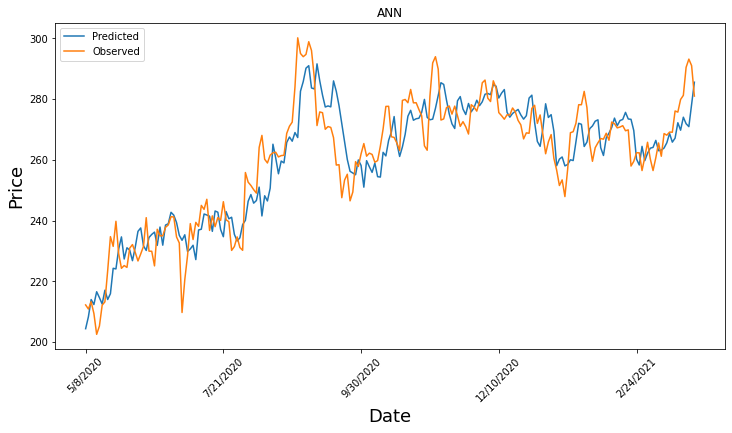

In [43]:
plt.figure(figsize=(12,6))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Observed"])
plt.xticks(range(0,len(y_test),50), testd[::50],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.title("ANN")
plt.show()


In [44]:
model_score = []
from sklearn import metrics
print("RMSE")
RMSE = metrics.mean_squared_error(y_pred, y_test, squared=False)
print(RMSE)
model_score.append(["ANN", RMSE])

RMSE
8.850273607355245
